In [1]:
import hashlib
import math
import random
from PIL import Image, ImageDraw
from IPython.display import display

In [2]:
def input_hash():
    input_str = input("Input a string: ").encode("utf8")
    getMD5 = hashlib.md5()
    getMD5.update(input_str)
    hash1 = getMD5.hexdigest()
    getMD5.update(hash1.encode("utf8"))
    hash2 = getMD5.hexdigest()
    
    return hash1, hash2

def draw_image(style="binary"):
    hash1, hash2 = input_hash()
    
    image_size = 10 # generated identicon size is image_size * square_size
    square_size = 50
    
    fgc = tuple([int(x, 16) for x in (hash1[0:2], hash1[2:4], hash1[4:6])])
    bgc = tuple([int(x, 16) for x in (hash2[-2:], hash2[-4:-2], hash2[-6:-4])])
    
    identicon = Image.new('RGB', (image_size * square_size, image_size * square_size), bgc)
    draw = ImageDraw.Draw(identicon, "RGBA")
    short_hash = hash1[6:]+hash2[6:]
    hash_list = [int(x, 16) for x in short_hash]
    
    if style == "binary":
        for x in range(int(image_size/2)):
            for y in range(int(image_size)):
                index = x * image_size + y+1
                if hash_list[index] % 2 == 0:
                    #Draw the left side
                    draw.rectangle((x*square_size, y*square_size, (x+1)*square_size, (y+1)*square_size), fill=fgc, outline=fgc)
                    #Draw the mirror side
                    
                    draw.rectangle(((image_size-x)*square_size, y*square_size, (image_size-(x+1))*square_size, (y+1)*square_size),fill=fgc, outline=fgc)
    elif style == "mosaic":
        for x in range(int(image_size/2)):
            for y in range(int(image_size)):
                index = x * image_size + y+1
                if hash_list[index] != 0:
                    # get color and alpha value
                    color = [index**2, index, int(index**2/2)]
                    random.seed(hash_list[index])
                    random.shuffle(color)
                    color.append(random.randint(0,255))
                    color = tuple(color)
                    #Draw the left side
                    draw.rectangle((x*square_size, y*square_size, (x+1)*square_size, (y+1)*square_size), fill=color, outline=(0,0,0))
                    #Draw the mirror side
                    draw.rectangle(((image_size-x)*square_size, y*square_size, (image_size-(x+1))*square_size, (y+1)*square_size),fill=color, outline=(0,0,0))
    
    display(identicon)
    
    return

Input a string: 桃花乱落如红雨


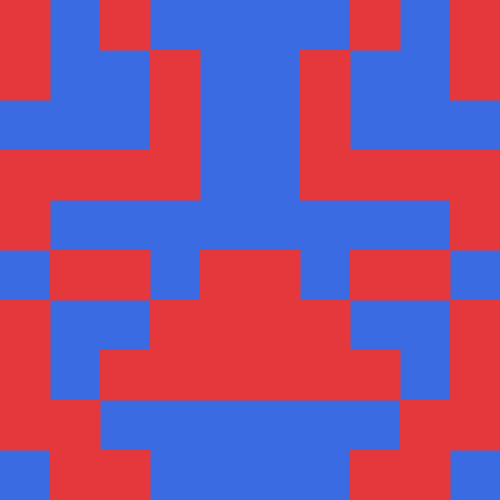

In [7]:
draw_image(style="binary")

Input a string: 桃花乱落如红雨


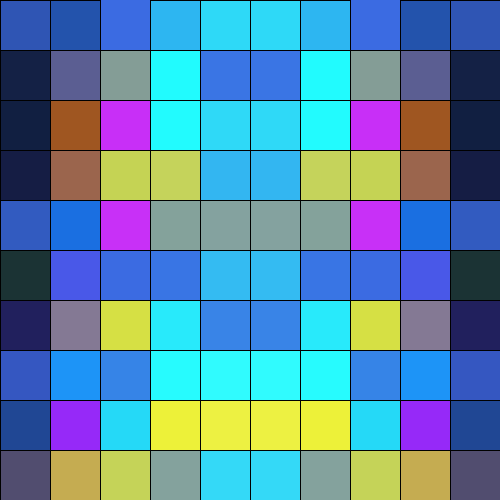

In [8]:
draw_image(style="mosaic")